In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [5]:
print(type(housing))

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print(housing.feature_names)
print(housing.target)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
dataset = pd.DataFrame(data=housing.data,columns= housing.feature_names)
dataset.info()
print(type(dataset))
dataset.describe()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# checking the missing value
missing_value = dataset.isnull()
print(missing_value)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  
0          False  
1

In [10]:
# missing value per column
missing_value_cout = dataset.isnull().sum()
print(missing_value_cout)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [11]:
# drop missing values
missing_value_drop = dataset.dropna()
print(missing_value_drop)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [12]:
# Fill missing values
missing_value_fill = dataset.fillna(dataset.mean())
print(missing_value_fill)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [13]:
# EDA
# find correlation 
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


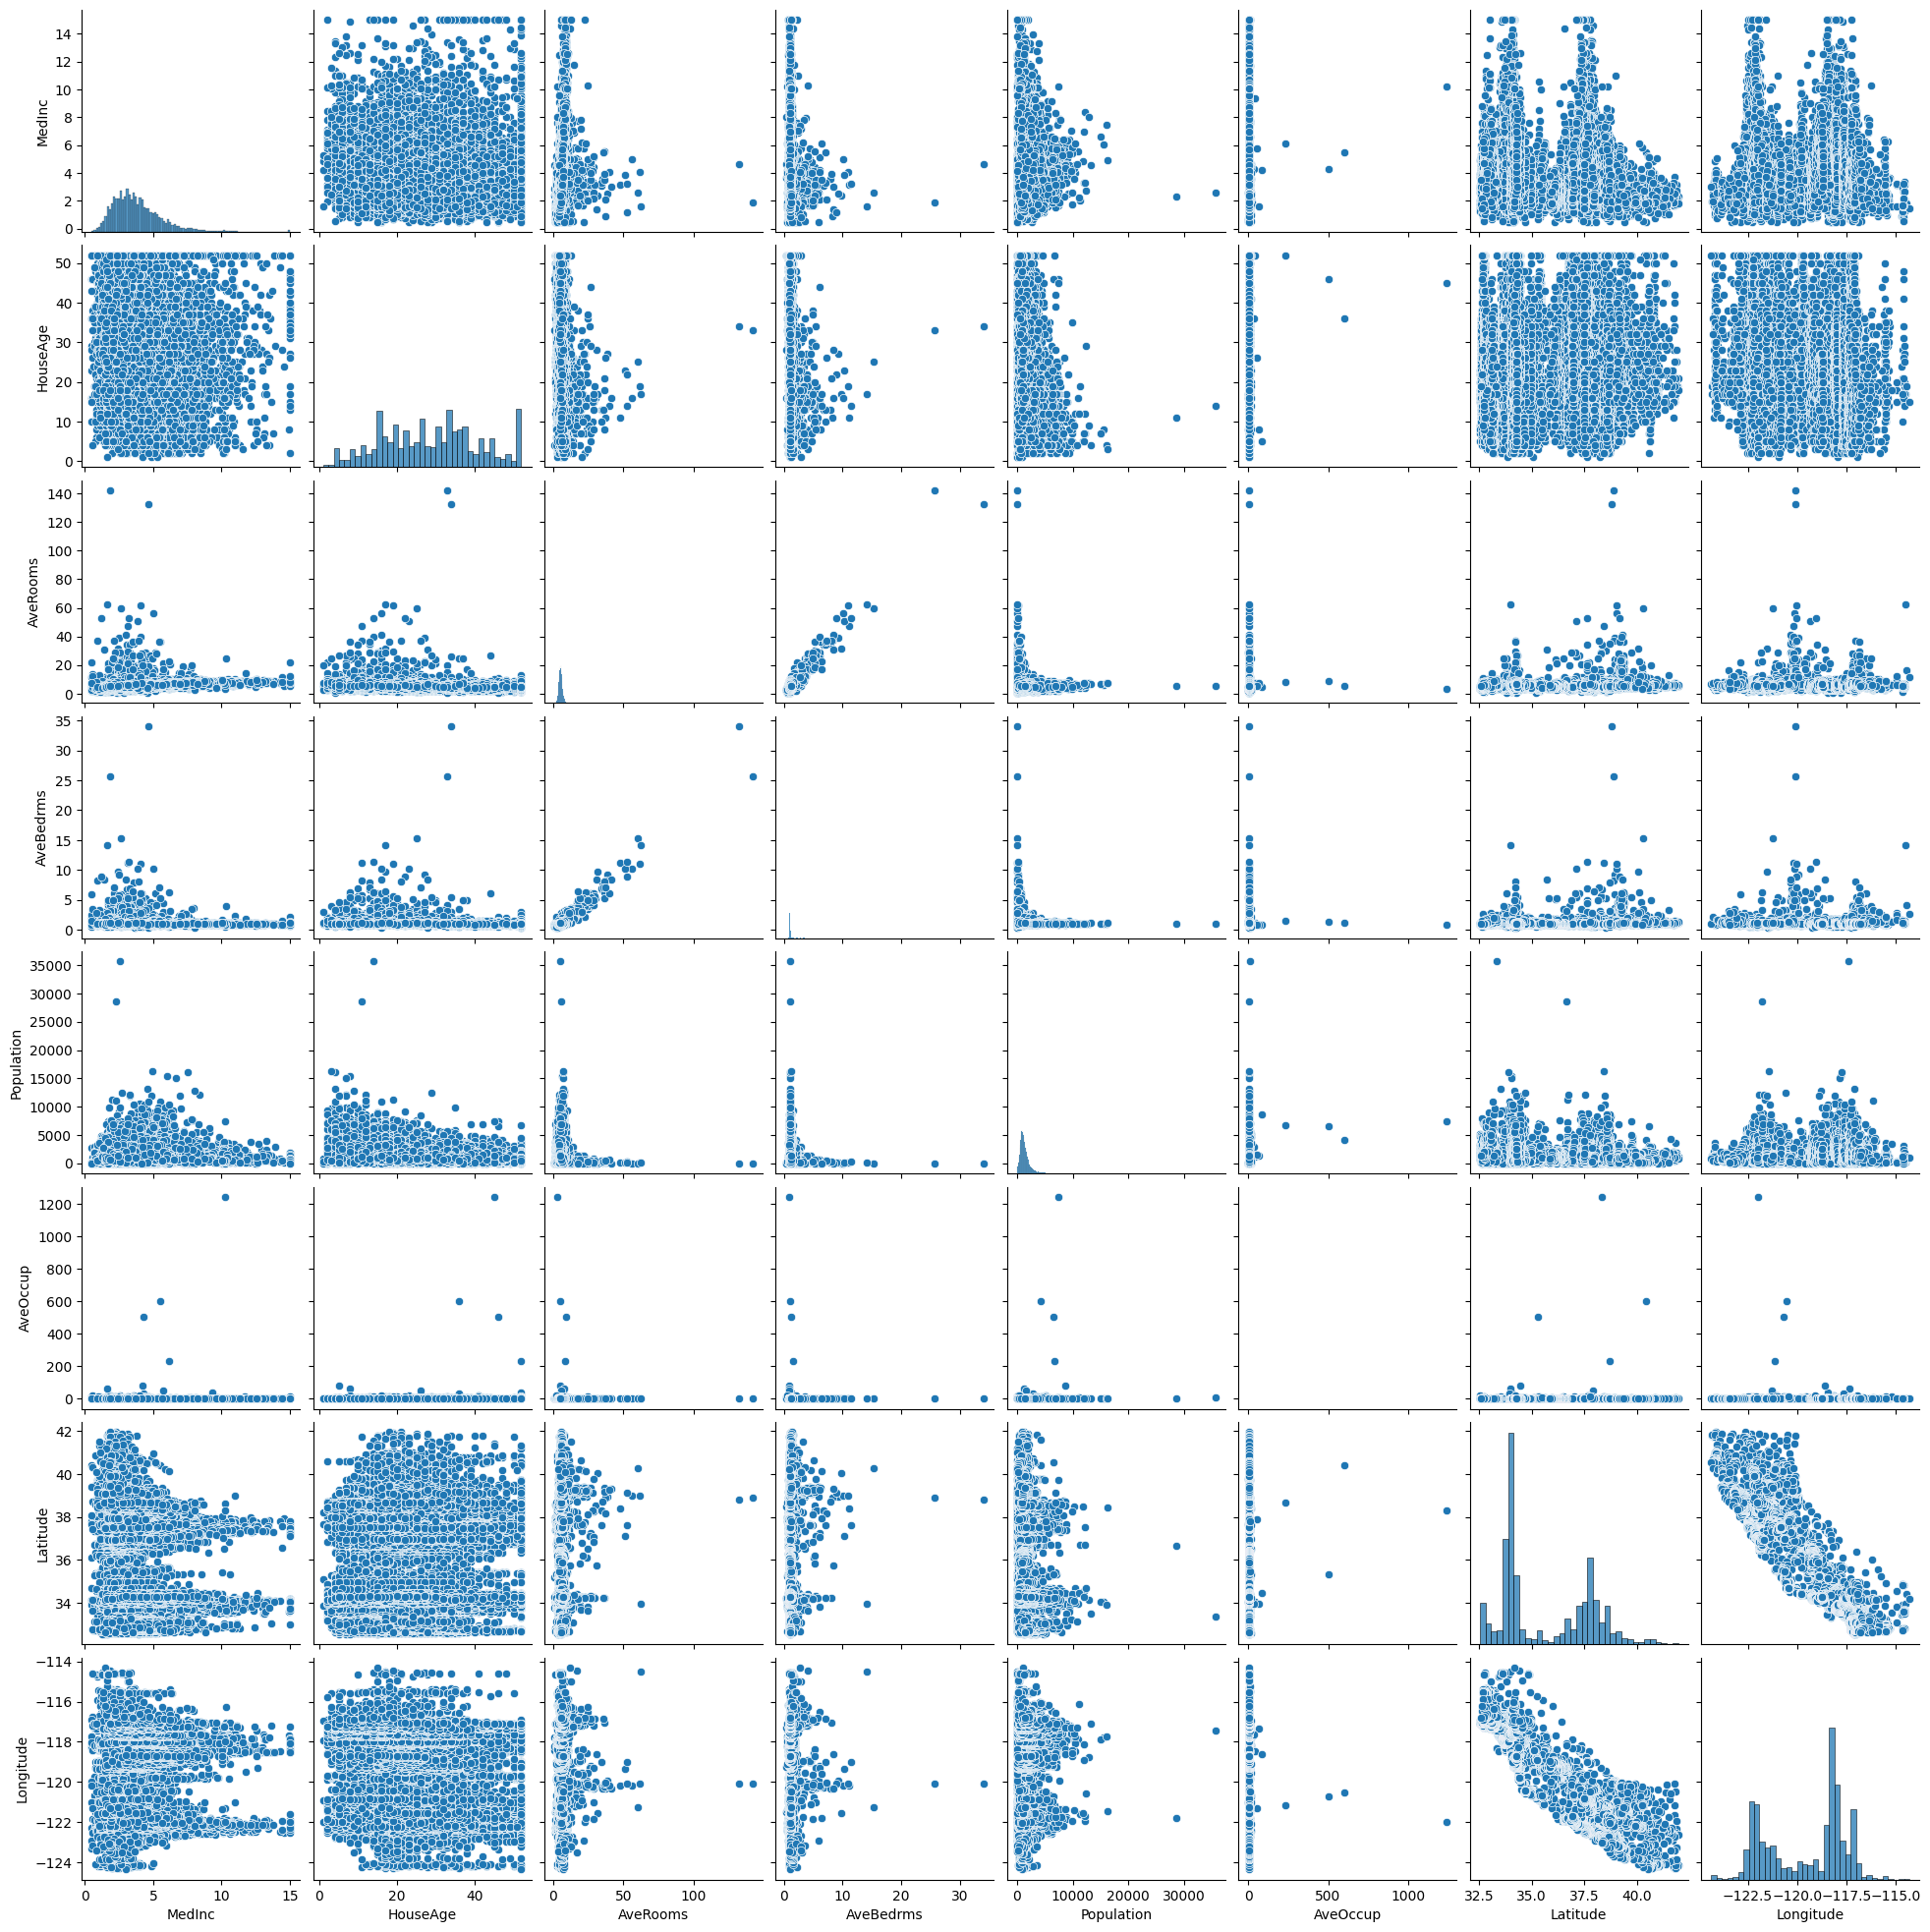

In [14]:
sns.pairplot(dataset)

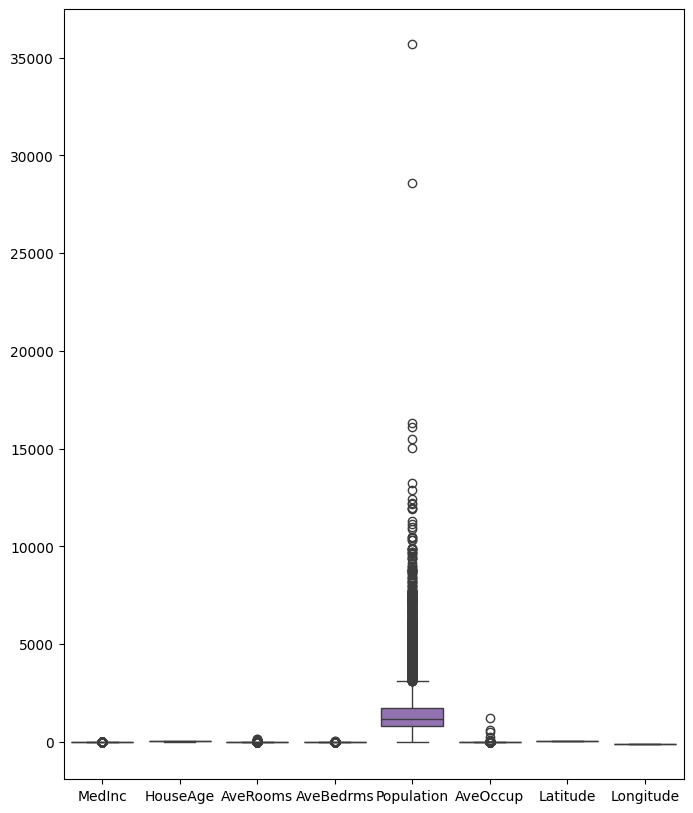

In [15]:
fig,ax=plt.subplots(figsize=(8,10))
sns.boxplot(data=dataset,ax=ax)
plt.savefig("boxplot.jpg")  #save the image & in any extension


In [16]:
# For feature of test and train
features=dataset.iloc[:,:-1]
target=dataset.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [17]:
x=[2,3,4,5]
print(x[-1:2])

[]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_norm=scaler.fit_transform(x_train)

In [19]:
x_test_norm=scaler.fit_transform(x_test)

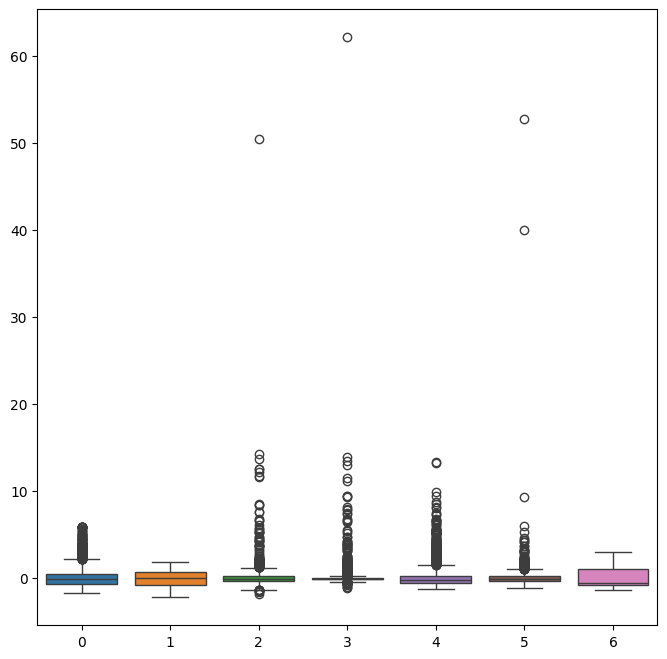

In [20]:
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=x_test_norm,ax=ax)
plt.savefig("boxplot_n.jpg")  #save the image & in any extension

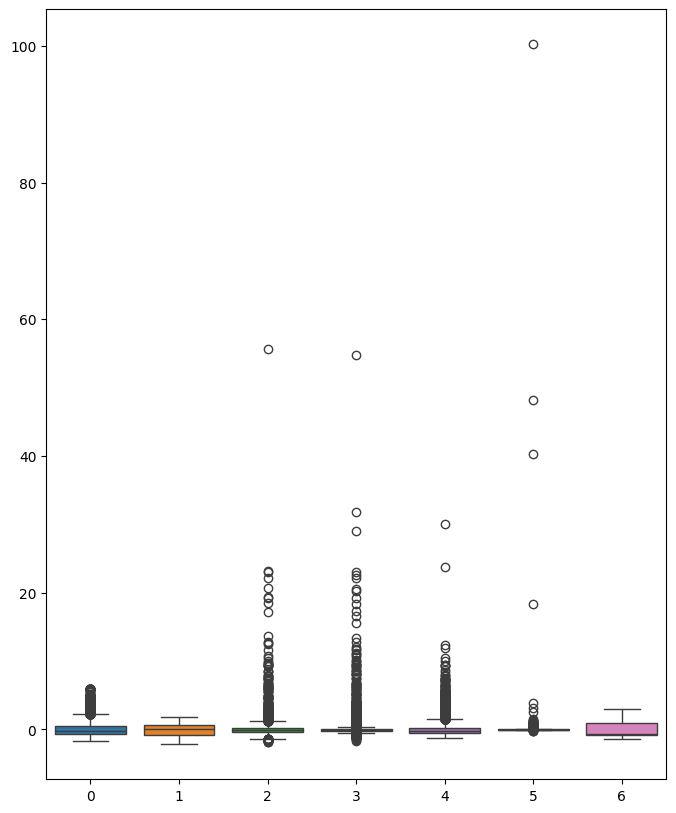

In [21]:
fig,ax=plt.subplots(figsize=(8,10))
sns.boxplot(data=x_train_norm,ax=ax)
plt.savefig("boxplot_norm.jpg")  #save the image & in any extension

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [23]:
regression=LinearRegression()

In [24]:
regression.fit(x_train_norm,y_train)

LinearRegression()

In [25]:
slope_values=regression.coef_
print(slope_values)
intercept_value=regression.intercept_
print(intercept_value)

[-0.38306674 -0.2062471   0.47933705 -0.27941541 -0.05497227  0.02780921
 -1.91642044]
-119.58410229789591


In [26]:
reg_pred=regression.predict(x_test_norm)
reg_pred

array([-119.67921968, -119.06819432, -122.21945609, ..., -118.07407332,
       -121.41205839, -118.42692326], shape=(6192,))

In [27]:
residuals=y_test-reg_pred
residuals

20046    0.669220
3024    -0.391806
15663   -0.220544
20484   -0.299147
9814    -1.420269
           ...   
17505   -0.448279
13512    0.800412
10842    0.164073
16559    0.132058
5786     0.186923
Name: Longitude, Length: 6192, dtype: float64

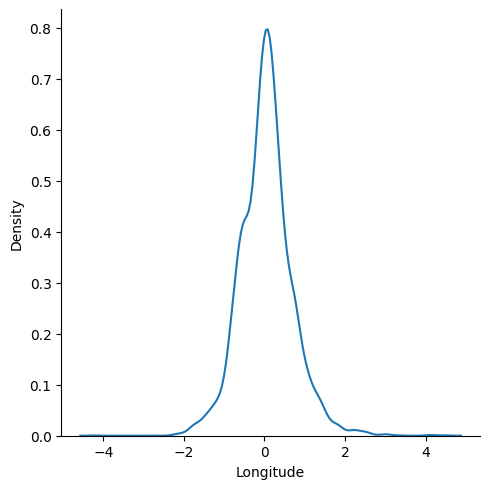

In [28]:
sns.displot(residuals,kind="kde")

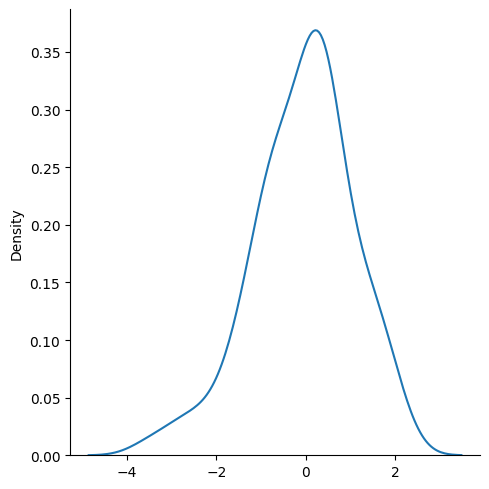

In [29]:
residuals_sample= np.random.normal(0,1,100)
sns.displot(residuals_sample,kind="kde")
plt.show()

In [30]:
mse=mean_squared_error(y_test,reg_pred)
print(mse)

0.42794725996968186


In [31]:
mae=mean_absolute_error(y_test,reg_pred)
print(mae)

0.4828887908966531


In [32]:
r2=r2_score(y_test,reg_pred)
print(r2)

0.8934964405130786


In [33]:
# r2_adjusted= 1- ((n-1)/(n-k-1))*(1-r2)

In [34]:
n=len(y_test)
r2s=r2_score(y_test,reg_pred)
k=x_test_norm.shape[1]
print(n," ",r2s," ",k)
adjusted_r2= 1- ((n-1)/(n-k-1))*(1-r2s)
print("Value of r2 adjusted",adjusted_r2)

6192   0.8934964405130786   7
Value of r2 adjusted 0.8933758834438017


In [35]:
import pickle
pickle.dump(regression, open('reg_model.pkl','wb'))

In [36]:
# Use the trained model for prediction
model = pickle.load(open('reg_model.pkl','rb'))

In [37]:
# Print the type of model
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>


In [38]:
# dataset = pd.DataFrame(data=housing.data,columns= housing.feature_names)
# model.predict(dataset)

In [39]:
from sklearn.linear_model import Lasso , Ridge

In [40]:
ridge_regression=Ridge(alpha= 1.0)
ridge_regression.fit(x_train_norm,y_train)
print("cofficient aftr the ridge_regrrssion", ridge_regression.coef_)

lasso_regression=Lasso(alpha=1.0)
lasso_regression.fit(x_train_norm,y_train)
print("cofficient aftr the ridge_regrrssion", lasso_regression.coef_)

cofficient aftr the ridge_regrrssion [-0.38281906 -0.20624161  0.47880225 -0.27893763 -0.05495492  0.02779873
 -1.91624273]
cofficient aftr the ridge_regrrssion [-0.         -0.          0.          0.          0.          0.
 -0.84945841]


In [41]:
ridge_pred= ridge_regression.predict(x_test_norm)
lasso_pred= lasso_regression.predict(x_test_norm)

In [42]:
# generate the matrices of various loss functions
ridge_mse = mean_squared_error(y_test,ridge_pred)
rigde_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test,ridge_pred)
ridge_r2_score = r2_score(y_test,ridge_pred)

print("MSE :",ridge_mse)
print("RMSE :",rigde_rmse)
print("MAE :",ridge_mae)
print("R2 Score :", ridge_r2_score)

MSE : 0.4279632765449227
RMSE : 0.6541890220302713
MAE : 0.4829168434945021
R2 Score : 0.8934924544558386


In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(11)
knn.fit(x_train_norm,y_train)

KNeighborsRegressor(n_neighbors=11)

In [44]:
y_predict_knn=knn.predict(x_test_norm)
print(y_predict_knn)

[-119.36363636 -119.15363636 -122.42636364 ... -118.12       -121.51909091
 -118.35363636]


In [45]:
# generate the matrices of various loss functions
ridge_mse = mean_squared_error(y_test,y_predict_knn)
rigde_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test,y_predict_knn)
ridge_r2_score = r2_score(y_test,y_predict_knn)

print("MSE :",ridge_mse)
print("RMSE :",rigde_rmse)
print("MAE :",ridge_mae)
print("R2 Score :", ridge_r2_score)

MSE : 0.3117910103946439
RMSE : 0.5583824947064905
MAE : 0.3614007810664785
R2 Score : 0.9224043345308348


In [46]:
# generate the matrices of various loss functions
ridge_mse = mean_squared_error(y_test,ridge_pred)
rigde_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test,ridge_pred)
ridge_r2_score = r2_score(y_test,ridge_pred)

print("MSE :",ridge_mse)
print("RMSE :",rigde_rmse)
print("MAE :",ridge_mae)
print("R2 Score :", ridge_r2_score)

MSE : 0.4279632765449227
RMSE : 0.6541890220302713
MAE : 0.4829168434945021
R2 Score : 0.8934924544558386


In [47]:
residuals = y_test - y_predict_knn
residuals

20046    0.353636
3024    -0.306364
15663   -0.013636
20484   -0.577273
9814    -1.604545
           ...   
17505    0.216364
13512    0.921818
10842    0.210000
16559    0.239091
5786     0.113636
Name: Longitude, Length: 6192, dtype: float64

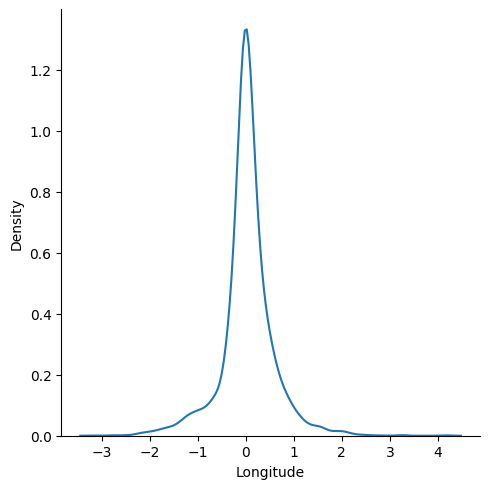

In [48]:
sns.displot(residuals,kind='kde')